In [1]:
print("hello")

!wget --no-check-certificate https://cvrr-nas.ucsd.edu/LISA/Datasets/signDatabasePublicFramesOnly.zip

hello
--2023-03-04 23:53:43--  https://cvrr-nas.ucsd.edu/LISA/Datasets/signDatabasePublicFramesOnly.zip
Resolving cvrr-nas.ucsd.edu (cvrr-nas.ucsd.edu)... 132.239.223.20
Connecting to cvrr-nas.ucsd.edu (cvrr-nas.ucsd.edu)|132.239.223.20|:443... connected.
  EE certificate key too weak
HTTP request sent, awaiting response... 200 OK
Length: 8309368306 (7.7G) [application/zip]
Saving to: ‘signDatabasePublicFramesOnly.zip’

signDatabasePublicF 100%[===================>]   7.74G  16.2MB/s    in 8m 26s  

2023-03-05 00:02:09 (15.7 MB/s) - ‘signDatabasePublicFramesOnly.zip’ saved [8309368306/8309368306]



In [ ]:
!unzip signDatabasePublicFramesOnly.zip

In [3]:
! ls
# ! cd ..
# ! cd aiua120214-0

import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf
import tensorflow_datasets as tfds

print(tf.__version__)

import pathlib
import os.path
from os import path
import sys
print(sys.path)

# dataset_dir = "aiua120214-0/frameAnnotations-DataLog02142012_external_camera"
dataset_dir = "aiua120214-0"
data_dir = pathlib.Path(dataset_dir).with_suffix('');
print(data_dir);
traffic_signs = list(data_dir.glob('*/*.png'));
# traffic_sign_set=set()
# print(type(traffic_sign_set))

# print(data_dir.getFiles());
print(traffic_signs);

# for traffic_sign in traffic_signs:
#   filename = str(traffic_sign).split("/")[2];
#   sign = filename.split("_", 1);
#   # print(sign);
#   traffic_sign_set.add(sign[0]);

# print(traffic_sign_set);


aiua120214-0	    datasetDescription.pdf	      vid1   vid6
aiua120214-1	    negatives			      vid10  vid7
aiua120214-2	    readme.txt			      vid11  vid8
aiua120306-0	    sample_data			      vid2   vid9
aiua120306-1	    signDatabasePublicFramesOnly.zip  vid3   videoSources.txt
allAnnotations.csv  tools			      vid4
categories.txt	    vid0			      vid5
2.11.0
['/content', '/env/python', '/usr/lib/python38.zip', '/usr/lib/python3.8', '/usr/lib/python3.8/lib-dynload', '', '/usr/local/lib/python3.8/dist-packages', '/usr/lib/python3/dist-packages', '/usr/local/lib/python3.8/dist-packages/IPython/extensions', '/root/.ipython']
aiua120214-0
[PosixPath('aiua120214-0/frameAnnotations-DataLog02142012_external_camera.avi_annotations/stop_1330546190.avi_image13.png'), PosixPath('aiua120214-0/frameAnnotations-DataLog02142012_external_camera.avi_annotations/signalAhead_1330546728.avi_image1.png'), PosixPath('aiua120214-0/frameAnnotations-DataLog02142012_external_camera.avi_annotations/speedLimit_1330

In [4]:
# ! pwd
# ! ls
# ! mkdir traffic_signs
# ! cd traffic_signs


# for ts in traffic_sign_set:
#   os.mkdir(path+ts)

# ! pwd
# ! ls traffic_signs



In [ ]:

# print(traffic_signs)
# ! rm -rf traffic_signs
# ! ls traffic_signs/
# ! ls
! mkdir traffic_signs


# ts_dict = {};
destination_parent_folder = "traffic_signs/"

ts_set = os.listdir(destination_parent_folder);
print(type(ts_set));
for traffic_sign in traffic_signs:
  src_path = traffic_sign;
  print(traffic_sign);
  destn_filename = str(traffic_sign).split("/")[2];
  sign = destn_filename.split("_")[0];
  destination_sign_folder = destination_parent_folder + sign;
  destn_path = destination_sign_folder + "/" + destn_filename;
  if sign not in ts_set:
     os.mkdir(destination_sign_folder);
     ts_set.append(sign);
  os.replace(src_path, destn_path);




  # print(key);
  # traffic_sign_set.add(key);
  # value = ts_dict.get(key);
  # print(value)
  # directory = path + key;
  # if(value == None):
  #   os.mkdir(directory)
  #   # print(str(traffic_sign));
  #   value = str(traffic_sign);
  #   os.replace(value, directory + sign[2]);
  #   ts_dict[key] = [value];
  #   # print(ts_dict);
  # else:
  #   # value.append(str(traffic_sign));
  #   # dict = {key: value};
  #   # ts_dict.update(dict);
  #   value = str(traffic_sign);
  #   os.replace(value, directory + sign[2]);
  

# print(traffic_sign_set);

# key = "sto2p"

# for k,v in ts_dict.items():
#   print(k);
#   print(v);
#   print("************")

In [6]:
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf
import tensorflow_datasets as tfds

print(tf.__version__)

2.11.0


['/content', '/env/python', '/usr/lib/python38.zip', '/usr/lib/python3.8', '/usr/lib/python3.8/lib-dynload', '', '/usr/local/lib/python3.8/dist-packages', '/usr/lib/python3/dist-packages', '/usr/local/lib/python3.8/dist-packages/IPython/extensions', '/root/.ipython']
traffic_signs/train
418
True


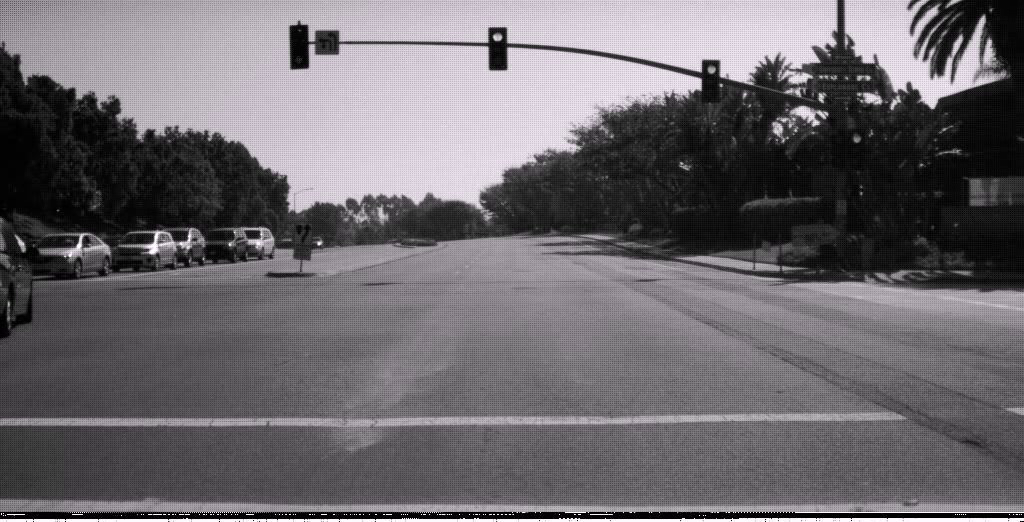

In [76]:
import pathlib
import os.path
from os import path
import sys
print(sys.path)

# dataset_dir = "aiua120214-0/frameAnnotations-DataLog02142012_external_camera"
dataset_dir = "traffic_signs/train"
data_dir = pathlib.Path(dataset_dir).with_suffix('');
print(data_dir);
traffic_signs = list(data_dir.glob('*/*.png'))
image_count = len(traffic_signs)
print(image_count)
print(path.exists(dataset_dir))
PIL.Image.open(str(traffic_signs[0]))



In [22]:
!ls

aiua120214-0	    datasetDescription.pdf	      vid0   vid5
aiua120214-1	    negatives			      vid1   vid6
aiua120214-2	    readme.txt			      vid10  vid7
aiua120306-0	    sample_data			      vid11  vid8
aiua120306-1	    signDatabasePublicFramesOnly.zip  vid2   vid9
allAnnotations.csv  tools			      vid3   videoSources.txt
categories.txt	    traffic_signs		      vid4


In [78]:
batch_size = 32
img_height = 180
img_width = 180

train_ds = tf.keras.utils.image_dataset_from_directory(
  dataset_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

val_ds = tf.keras.utils.image_dataset_from_directory(
  dataset_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

class_names = train_ds.class_names
print(class_names)

Found 418 files belonging to 9 classes.
Using 335 files for training.
Found 418 files belonging to 9 classes.
Using 83 files for validation.
['keepRight', 'laneEnds', 'leftTurn', 'pedestrianCrossing', 'rightLaneMustTurn', 'school', 'signalAhead', 'speedLimit', 'stop']


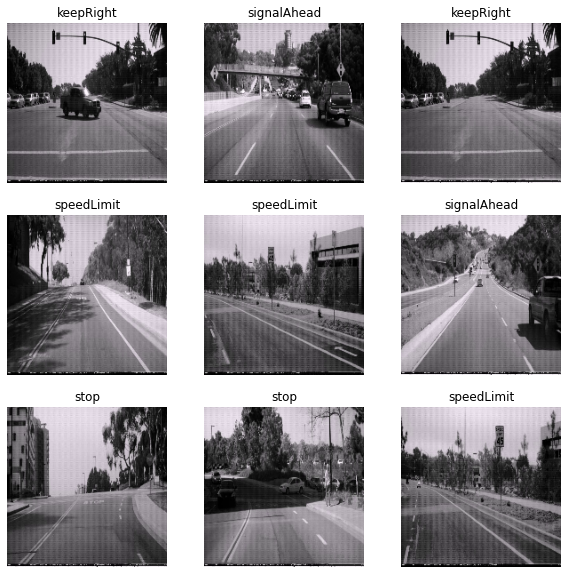

In [79]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [81]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

normalization_layer = layers.Rescaling(1./255)

normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

(32, 180, 180, 3)
(32,)
0.0 1.0


In [82]:
num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])


In [108]:
model1 = Sequential();
model1.add(Conv2D(filters=1, kernel_size=1, input_shape=(50,50,1)));
model1.build();
# model1.compile(optimizer='adam',
#               loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
#               metrics=['accuracy'])

model1.summary();

Model: "sequential_33"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_19 (Conv2D)          (None, 50, 50, 1)         2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [83]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_4 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_4 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 90, 90, 16)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 45, 45, 64)      

In [84]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
11/11 [==============================] - 20s 2s/step - loss: 2.1198 - accuracy: 0.2388 - val_loss: 1.7976 - val_accuracy: 0.2651
Epoch 2/10
11/11 [==============================] - 19s 2s/step - loss: 1.4389 - accuracy: 0.5463 - val_loss: 0.9925 - val_accuracy: 0.6747
Epoch 3/10
11/11 [==============================] - 13s 1s/step - loss: 0.5775 - accuracy: 0.8776 - val_loss: 0.4958 - val_accuracy: 0.8795
Epoch 4/10
11/11 [==============================] - 13s 1s/step - loss: 0.2545 - accuracy: 0.9493 - val_loss: 0.1754 - val_accuracy: 0.9639
Epoch 5/10
11/11 [==============================] - 13s 1s/step - loss: 0.0787 - accuracy: 0.9881 - val_loss: 0.1021 - val_accuracy: 0.9759
Epoch 6/10
11/11 [==============================] - 13s 1s/step - loss: 0.0210 - accuracy: 0.9970 - val_loss: 0.0470 - val_accuracy: 0.9880
Epoch 7/10
11/11 [==============================] - 16s 2s/step - loss: 0.0056 - accuracy: 1.0000 - val_loss: 0.0203 - val_accuracy: 0.9880
Epoch 8/10
11/11 [==

Exception ignored in: <function UniquePtr.__del__ at 0x7f0c242da5e0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/tensorflow/python/framework/c_api_util.py", line 70, in __del__
    def __del__(self):
KeyboardInterrupt: 


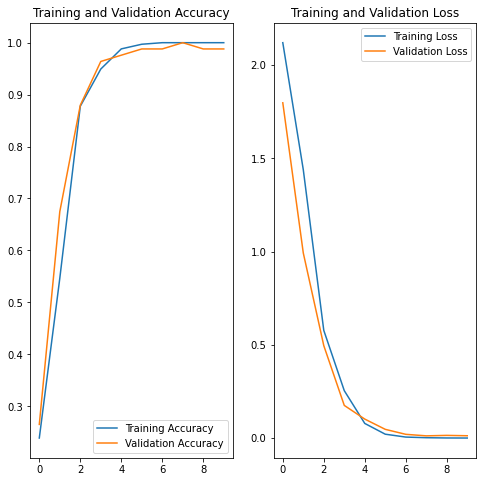

In [85]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [89]:
# test_sign_path = "traffic_signs/test/stop_1330545935.avi_image1.png"
# test_sign_path = "traffic_signs/test/speedLimit_1330545914.avi_image1.png"
# test_sign_path = "aiua120214-1/frameAnnotations-DataLog02142012_001_external_camera.avi_annotations/signalAhead_1331865987.avi_image5.png"

test_sign_path ="aiua120214-1/frameAnnotations-DataLog02142012_001_external_camera.avi_annotations/signalAhead_1331866051.avi_image8.png"
# sunflower_path = tf.keras.utils.get_file('Red_sunflower', origin=sunflower_url)

img = tf.keras.utils.load_img(
    test_sign_path, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print("This image most likely belongs to {} with a {:.2f} percent confidence.".format(class_names[np.argmax(score)], 100 * np.max(score))
)

1/1 [==============================] - 0s 32ms/step
This image most likely belongs to signalAhead with a 98.37 percent confidence.
